# 26. GAN

In [1]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 26.1 Prepare MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

In [4]:
batch_size = 100

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True)

In [5]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

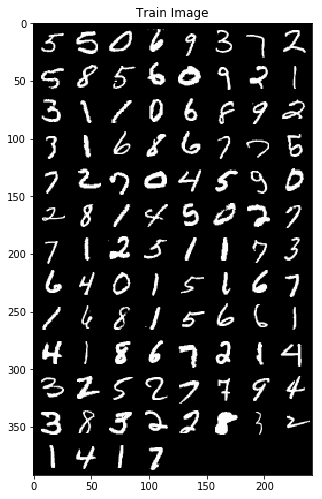

In [6]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

## 26.2 Define Model

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(500, 250),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(250, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.discriminator(x)
        return out

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(100, 250),
            nn.LeakyReLU(0.2),
            nn.Linear(250, 500),
            nn.LeakyReLU(0.2),
            nn.Linear(500, 28*28),
            nn.Sigmoid()
        )
        
    def forward(self, z):
        out = self.generator(z)
        out = out.view(-1, 1, 28, 28)
        return out

In [9]:
D = Discriminator().cuda()
G = Generator().cuda()

## 26.3 Train Model

In [10]:
def gan_loss(x, target_is_real):
    
    loss = nn.BCELoss()
    
    if target_is_real : 
        target_tensor = torch.ones(batch_size, 1)
        
    else :
        target_tensor = torch.zeros(batch_size, 1)
        
    return loss(x, target_tensor.cuda())

In [11]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0001)
D_optimizer = optim.Adam(D.parameters(), lr=0.0001)

In [12]:
num_epochs = 50

In [13]:
for epoch in range(num_epochs):
        
    total_batch = len(mnist_train) // batch_size
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.cuda()
            
        # Discreminator
        prob_real = D(images)
        D_loss_real = gan_loss(prob_real, True)

        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        D_loss_fake = gan_loss(prob_fake, False)
        
        D_loss = D_loss_real + D_loss_fake
        
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        # Generator
        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        G_loss = gan_loss(prob_fake, True)
        
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], D_Loss: %.4f, G_Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, D_loss.item(), G_loss.item()))

Epoch [1/50], lter [100/600], D_Loss: 0.7897, G_Loss: 1.5177
Epoch [1/50], lter [200/600], D_Loss: 0.6901, G_Loss: 1.9714
Epoch [1/50], lter [300/600], D_Loss: 0.7892, G_Loss: 1.9605
Epoch [1/50], lter [400/600], D_Loss: 1.4082, G_Loss: 1.1039
Epoch [1/50], lter [500/600], D_Loss: 0.9974, G_Loss: 1.3132
Epoch [1/50], lter [600/600], D_Loss: 1.5524, G_Loss: 0.9764
Epoch [2/50], lter [100/600], D_Loss: 1.2443, G_Loss: 0.9306
Epoch [2/50], lter [200/600], D_Loss: 1.2851, G_Loss: 0.8044
Epoch [2/50], lter [300/600], D_Loss: 1.3454, G_Loss: 0.7587
Epoch [2/50], lter [400/600], D_Loss: 1.3697, G_Loss: 0.6335
Epoch [2/50], lter [500/600], D_Loss: 0.9828, G_Loss: 0.8494
Epoch [2/50], lter [600/600], D_Loss: 0.7884, G_Loss: 0.9812
Epoch [3/50], lter [100/600], D_Loss: 0.6611, G_Loss: 1.3799
Epoch [3/50], lter [200/600], D_Loss: 1.2790, G_Loss: 2.3429
Epoch [3/50], lter [300/600], D_Loss: 0.5378, G_Loss: 2.9178
Epoch [3/50], lter [400/600], D_Loss: 0.6048, G_Loss: 2.1061
Epoch [3/50], lter [500/

Epoch [45/50], lter [200/600], D_Loss: 0.5067, G_Loss: 2.4849
Epoch [45/50], lter [300/600], D_Loss: 0.6498, G_Loss: 2.1934
Epoch [45/50], lter [400/600], D_Loss: 0.4915, G_Loss: 2.5376
Epoch [45/50], lter [500/600], D_Loss: 0.4934, G_Loss: 2.8055
Epoch [45/50], lter [600/600], D_Loss: 0.5157, G_Loss: 2.5512
Epoch [46/50], lter [100/600], D_Loss: 0.6178, G_Loss: 2.5609
Epoch [46/50], lter [200/600], D_Loss: 0.5587, G_Loss: 2.4730
Epoch [46/50], lter [300/600], D_Loss: 0.4562, G_Loss: 2.9484
Epoch [46/50], lter [400/600], D_Loss: 0.5584, G_Loss: 2.7127
Epoch [46/50], lter [500/600], D_Loss: 0.4779, G_Loss: 2.5300
Epoch [46/50], lter [600/600], D_Loss: 0.4514, G_Loss: 3.1584
Epoch [47/50], lter [100/600], D_Loss: 0.5407, G_Loss: 2.3033
Epoch [47/50], lter [200/600], D_Loss: 0.6299, G_Loss: 2.5757
Epoch [47/50], lter [300/600], D_Loss: 0.5648, G_Loss: 2.6509
Epoch [47/50], lter [400/600], D_Loss: 0.4665, G_Loss: 2.7873
Epoch [47/50], lter [500/600], D_Loss: 0.5531, G_Loss: 2.8984
Epoch [4

## 26.4 Test Model

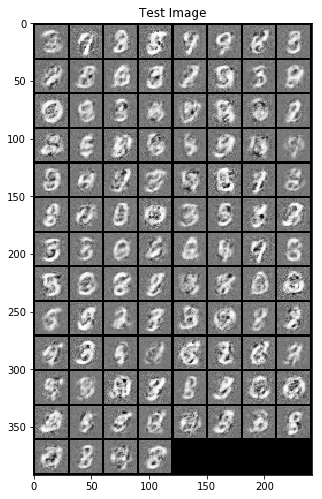

In [14]:
G.eval()

z = torch.randn((batch_size, 100)).cuda()
images = G(z)
imshow(torchvision.utils.make_grid(images.data.cpu(), normalize=True), "Test Image")